# Read Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('C:\\Users\\Iyan\\Downloads\\old_cars.csv')
data

,Car,MPG,Displacement,Horsepower,Weight,Model,Origin
0,AMC Ambassador Brougham,13.0,360.0,175,3821,73,US
1,AMC Ambassador DPL,15.0,390.0,190,3850,70,US
2,AMC Ambassador SST,17.0,304.0,150,3672,72,US
3,AMC Concord,19.4,232.0,90,3210,78,US
4,AMC Concord,24.3,151.0,90,3003,80,US
...,...,...,...,...,...,...,...
393,Volvo 145e (sw),18.0,121.0,112,2933,72,Europe
394,Volvo 244DL,22.0,121.0,98,2945,75,Europe
395,Volvo 245,20.0,130.0,102,3150,76,Europe
396,Volvo 264gl,17.0,163.0,125,3140,78,Europe


# All Type of each Columns 

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car           398 non-null    object 
 1   MPG           398 non-null    float64
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    int64  
 4   Weight        398 non-null    int64  
 5   Model         398 non-null    int64  
 6   Origin        398 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 21.9+ KB


# Cek Duplikat, Cek Null

In [3]:
colomnya=data.columns.to_list()
for y in colomnya:
    print(f'Dari kolom {y} nilai duplikatnya',(data[y].duplicated().sum()))
    print(f'Dari kolom {y} nilai NaN nya',(data[y].isnull().sum()))
    print(f'Dari kolom {y} nilai uniquenya',(len(data[y].unique())))
    print(f'Dari kolom {y} tipe nilai nya',(data[y].dtypes),'\n')

Dari kolom Car nilai duplikatnya 97
Dari kolom Car nilai NaN nya 0
Dari kolom Car nilai uniquenya 301
Dari kolom Car tipe nilai nya object 

Dari kolom MPG nilai duplikatnya 269
Dari kolom MPG nilai NaN nya 0
Dari kolom MPG nilai uniquenya 129
Dari kolom MPG tipe nilai nya float64 

Dari kolom Displacement nilai duplikatnya 316
Dari kolom Displacement nilai NaN nya 0
Dari kolom Displacement nilai uniquenya 82
Dari kolom Displacement tipe nilai nya float64 

Dari kolom Horsepower nilai duplikatnya 304
Dari kolom Horsepower nilai NaN nya 0
Dari kolom Horsepower nilai uniquenya 94
Dari kolom Horsepower tipe nilai nya int64 

Dari kolom Weight nilai duplikatnya 47
Dari kolom Weight nilai NaN nya 0
Dari kolom Weight nilai uniquenya 351
Dari kolom Weight tipe nilai nya int64 

Dari kolom Model nilai duplikatnya 385
Dari kolom Model nilai NaN nya 0
Dari kolom Model nilai uniquenya 13
Dari kolom Model tipe nilai nya int64 

Dari kolom Origin nilai duplikatnya 395
Dari kolom Origin nilai NaN ny

# Visualisasi Duplikat

In [4]:
group=data.columns.to_list()
duplicated=[]
unique_val=[]

for i in group:
    simpan_angka=0
    simpan_angka+=(len(data[i].unique()))
    unique_val.append(simpan_angka)
    duplicated.append(len(data)-simpan_angka)

In [5]:
df_for_tes=pd.DataFrame({'Duplicate':duplicated,'Unique':unique_val})
df_for_tes.index=group
df_for_tes

,Duplicate,Unique
Car,97,301
MPG,269,129
Displacement,316,82
Horsepower,304,94
Weight,47,351
Model,385,13
Origin,395,3


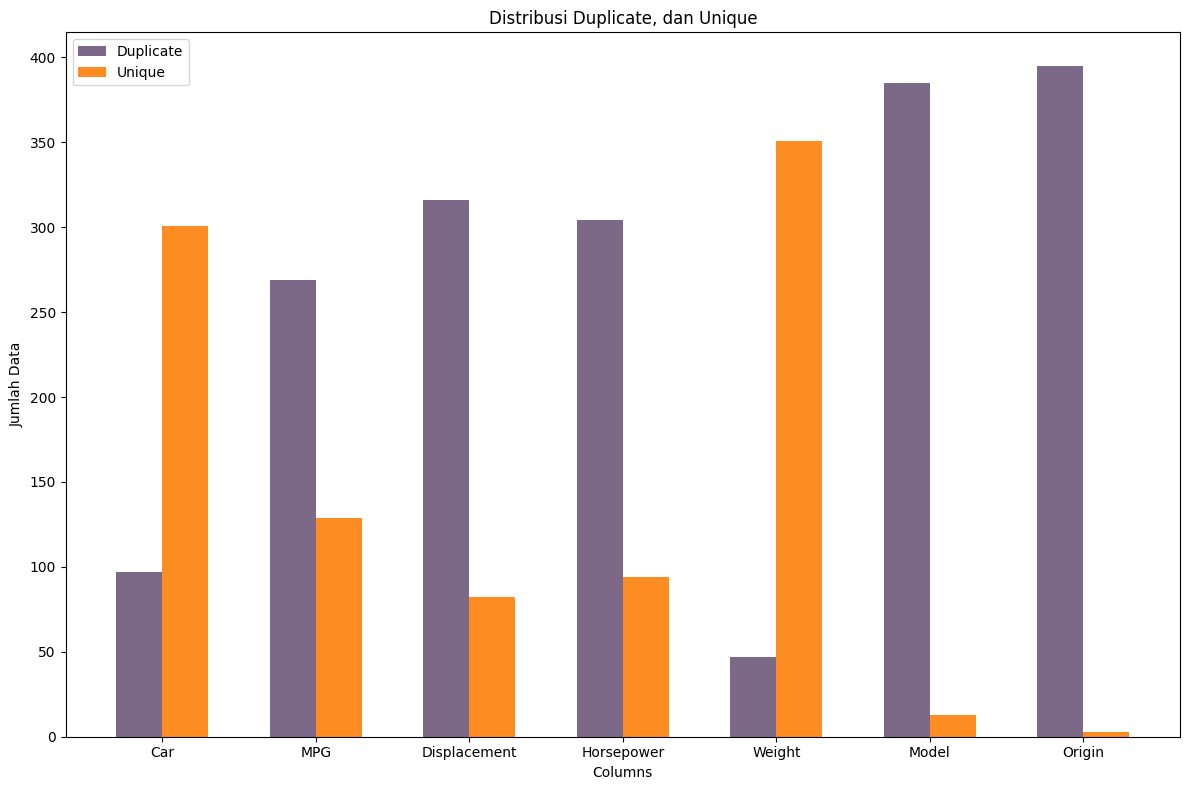

In [6]:
category=df_for_tes.index.to_list()
range_of_mpg=df_for_tes.columns.to_list()
for_chart=[]
colors=['#7c6987','#fd8c23']
for i in range_of_mpg:
    for_chart.append(df_for_tes[i])

width_bar=0.3
index=np.arange(len(category))

fig,ax=plt.subplots(figsize=(12,8))

for i in range(len(range_of_mpg)):
    ax.bar(index+i*width_bar, list(for_chart[i]), width_bar, label=f"{range_of_mpg[i]}", color=colors[i])

ax.set(xlabel='Columns',ylabel='Jumlah Data',title='Distribusi Duplicate, dan Unique'
       ,xticks=index + width_bar * (len(range_of_mpg) - 1) / 2,xticklabels=category)

ax.legend()

plt.tight_layout()
plt.show()

# Filter Data

In [7]:
data_japan=data[data['Origin']=='Japan']
data_us=data[data['Origin']=='US']
data_europe=data[data['Origin']=='Europe']
data_japan.reset_index(drop=True,inplace=True)
data_us.reset_index(drop=True,inplace=True)
data_europe.reset_index(drop=True,inplace=True)
display(data_japan.head())
display(data_us.head())
display(data_europe.head())

,Car,MPG,Displacement,Horsepower,Weight,Model,Origin
0,Datsun 1200,35.0,72.0,69,1613,71,Japan
1,Datsun 200-SX,23.9,119.0,97,2405,78,Japan
2,Datsun 200SX,32.9,119.0,100,2615,81,Japan
3,Datsun 210,31.8,85.0,65,2020,79,Japan
4,Datsun 210,40.8,85.0,65,2110,80,Japan


,Car,MPG,Displacement,Horsepower,Weight,Model,Origin
0,AMC Ambassador Brougham,13.0,360.0,175,3821,73,US
1,AMC Ambassador DPL,15.0,390.0,190,3850,70,US
2,AMC Ambassador SST,17.0,304.0,150,3672,72,US
3,AMC Concord,19.4,232.0,90,3210,78,US
4,AMC Concord,24.3,151.0,90,3003,80,US


,Car,MPG,Displacement,Horsepower,Weight,Model,Origin
0,Audi 100 LS,24.0,107.0,90,2430,70,Europe
1,Audi 100LS,20.0,114.0,91,2582,73,Europe
2,Audi 100LS,23.0,115.0,95,2694,75,Europe
3,Audi 4000,34.3,97.0,78,2188,80,Europe
4,Audi 5000,20.3,131.0,103,2830,78,Europe


# Box PLot

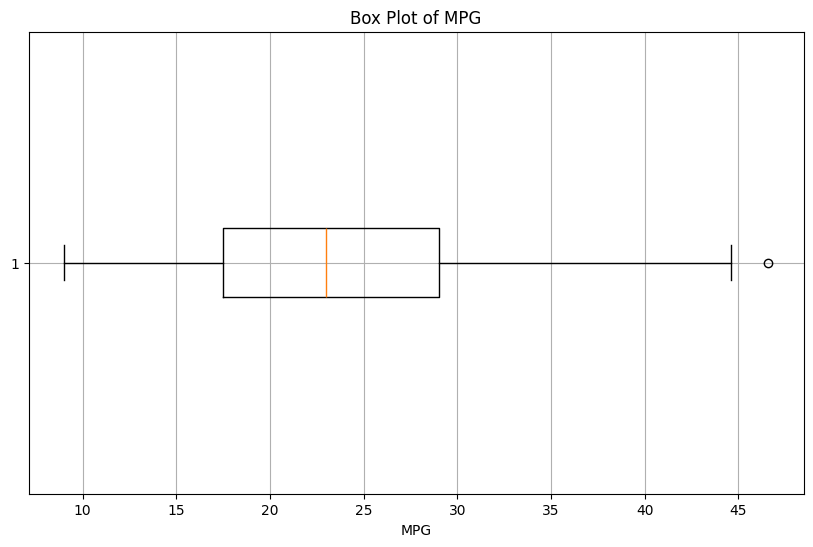

In [8]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['MPG'], vert=False)
plt.title('Box Plot of MPG')
plt.xlabel('MPG')
plt.grid()
plt.show()

# Heatmap

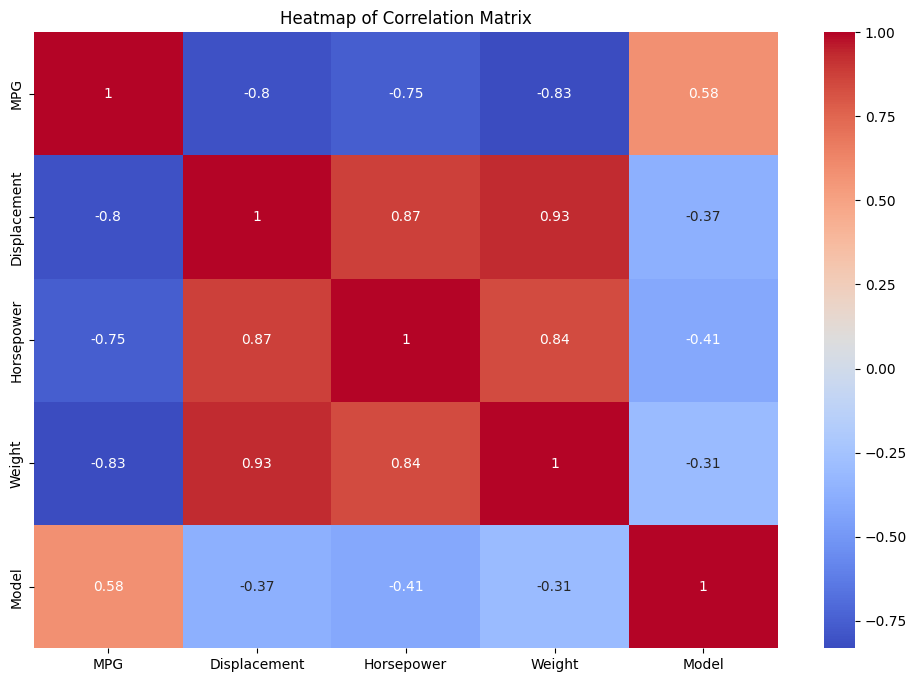

In [9]:
plt.figure(figsize=(12, 8))
corr_matrix = data.select_dtypes("number").corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Heatmap of Correlation Matrix")
plt.show()